In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import sys
sys.path.append("../ProcessModelResults/")
from my_functions import *
catchment_name = 'LinDyke'

In [19]:
model_directory = '../../../FloodModelling/{}Models/Model_{}Profiles/'.format(catchment_name, 'Observed')

In [4]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [20]:
# sys.path.append("../ProcessModelResults")
# from my_functions import *

if catchment_name == 'LinDyke':
    catchment_name_str = "Resampled.Terrain" 
    catchment_shpfilename = 'CatchmentLinDyke_exported'
    minx, miny, maxx, maxy  = 437000,  426500,  445500, 434300
    catchment_gdf = gpd.read_file(model_directory + 'CatchmentLinDyke_exported.shp')
    
elif catchment_name == 'WykeBeck':
    catchment_name_str = "Terrain.wykeDEM" 
    catchment_shpfilename = 'WykeBeckCatchment'
    minx, miny, maxx, maxy = 430004,  429978, 438660, 440996
    catchment_gdf = gpd.read_file(model_directory + 'WykeBeckCatchment.shp')
    
# Create a bounding box (this is used in preparing the rasters)
bbox = box(minx, miny, maxx, maxy)

In [48]:
n_flooded_cells_dict_2mins = {}
volumes_dict_2mins = {}
for method in ['6h_sp_bl_0.6', '6h_sp_bl_0.9']:
    print(method)
    n_flooded_cells_2mins = []
    volumes_2mins = []
    dates = []
    Hs=range(12,24)
    Ms= range(1,61,2)
    for H in Hs:
        for M in Ms:
            M = str(M).zfill(2)
            dates.append('{} {}'.format(H,M))
            fp = '../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (01AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
            try:
                depth_timeslice, out_meta  = open_and_clip_to_catchment(fp, catchment_gdf, True)
                number_flooded_cells = depth_timeslice[~np.isnan(depth_timeslice)].size
                #flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
                n_flooded_cells_2mins.append(number_flooded_cells)
                #volumes_2mins.append(flooded_volume)
            except:
                print(fp)
    # Add to dict
    n_flooded_cells_dict_2mins[method] = n_flooded_cells_2mins
    volumes_dict_2mins[method] = volumes_2mins

6h_sp_bl_0.6
6h_sp_bl_0.9


In [124]:
test_dict_5mins = {}
test_dict_volumes_5mins = {}
for method in methods_dict['Idealised']:
    print(method)
    n_flooded_cells_5mins = []
    volumes_5mins = []
    Hs=range(0,24)
    M = 0
    for day in [2,3]:
        for H in Hs:
                M = str(M).zfill(2)
                H = str(H).zfill(2)
                fp = '../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (0{}AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, day, H, M)
                print(fp)
                try:
                    depth_timeslice, out_meta  = open_and_clip_to_catchment(fp, catchment_gdf, True)
                    #number_flooded_cells = depth_timeslice[~np.isnan(depth_timeslice)].size
                    number_flooded_cells = depth_timeslice[depth_timeslice>0.1].size
                    #flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
                    n_flooded_cells_5mins.append(number_flooded_cells)
                    #volumes_5mins.append(flooded_volume)
                except:
                    print(fp)
        # Add to dict
        test_dict_5mins[method] = n_flooded_cells_5mins
        test_dict_volumes_5mins[method] = volumes_5mins

6h_sp_fl_0.1
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (02AUG2022 00 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (02AUG2022 01 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (02AUG2022 02 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (02AUG2022 03 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (02AUG2022 04 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (02AUG2022 05 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (02AUG2022 06 00 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (02AUG2022 07 00 00).Resampled.Terrain

In [125]:
# n_flooded_cells_dict_5mins = {}
# volumes_dict_5mins = {}
for method in ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4', '6h_sp_c_0.5', '6h_sp_bl_0.7','6h_sp_bl_0.8']:
    print(method)
    n_flooded_cells_5mins = []
    volumes_5mins = []
    Hs=range(12,24)
    Ms= range(0,60,5)
    for H in Hs:
        for M in Ms:
            if H == 12 and M == 0:
                pass
            else:
                M = str(M).zfill(2)
                fp = '../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/{}/Depth (01AUG2022 {} {} 00).Resampled.Terrain.tif'.format(method, H, M)
                print(fp)
#                 try:
#                     depth_timeslice, out_meta  = open_and_clip_to_catchment(fp, catchment_gdf, True)
#                     #number_flooded_cells = depth_timeslice[depth_timeslice>0.1].size
#                     number_flooded_cells = depth_timeslice[~np.isnan(depth_timeslice)].size
#                     #flooded_volume = np.sum(depth_timeslice[depth_timeslice>0.1])
#                     n_flooded_cells_5mins.append(number_flooded_cells)
#                     #volumes_5mins.append(flooded_volume)            
#                 except:
#                     print(fp)
#     # Add to dict
#     n_flooded_cells_dict_5mins[method] = n_flooded_cells_5mins
#     volumes_dict_5mins[method] = volumes_5mins
    
    

6h_sp_fl_0.1
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (01AUG2022 12 05 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (01AUG2022 12 10 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (01AUG2022 12 15 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (01AUG2022 12 20 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (01AUG2022 12 25 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (01AUG2022 12 30 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (01AUG2022 12 35 00).Resampled.Terrain.tif
../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/6h_sp_fl_0.1/Depth (01AUG2022 12 40 00).Resampled.Terrain

### Create dataframe

In [114]:
df_2mins = pd.DataFrame(n_flooded_cells_dict_2mins)
df_5mins = pd.DataFrame(n_flooded_cells_dict_5mins)
df_test = pd.DataFrame(test_dict_5mins)

In [119]:
df_2mins  =pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/depth_by_timestep/df_2mins.csv")
df_5mins  =pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/depth_by_timestep/df_5mins.csv")
# df_test  =pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/depth_by_timestep/df_test.csv")

### Convert from number of cells to area

In [120]:
df_2mins = df_2mins/1000000
df_5mins = df_5mins/1000000
# df_test = df_test/1000000

### Add minutes column

In [121]:
df_2mins['minute']= list(range(1,len(df_2mins)*2,2))
df_5mins['minute']= list(range(0,len(df_5mins)*5,5))
# df_test['minute']= list(range(720,(len(df_test)*60)+720,60))

### Save to csv

In [59]:
df_2mins.to_csv("df_2mins_withoutremoving0.1.csv",index=False)
df_5mins.to_csv("df_5mins_withoutremoving0.1.csv",index=False)
df_test.to_csv("df_test_withoutremoving0.1.csv",index=False)

### OR read in from csv

In [73]:
df_2mins  =pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/depth_by_timestep/df_2mins.csv")
df_5mins  =pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/depth_by_timestep/df_5mins.csv")
df_test  =pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/depth_by_timestep/df_test.csv")

In [64]:
df_2mins_withoutremoving = df_2mins
df_5mins_withoutremoving = df_5mins
df_test_withoutremoving = df_test

### Plot

In [103]:
df_test

,6h_sp_fl_0.1,6h_sp_fl_0.2,6h_sp_fl_0.3,6h_sp_fl_0.4,6h_sp_c_0.5,6h_sp_bl_0.7,6h_sp_bl_0.8,minute
0,0.020149,0.019409,0.019046,0.018817,0.018744,0.018697,0.018678,720
1,0.027680,0.025995,0.025521,0.025174,0.025090,0.024978,0.024846,780
2,0.034060,0.030913,0.029802,0.029158,0.028848,0.028704,0.028697,840
3,0.040095,0.035509,0.033708,0.033529,0.032861,0.032368,0.032327,900
4,0.044352,0.039554,0.037442,0.036596,0.036110,0.035604,0.035471,960
...,...,...,...,...,...,...,...,...
138,0.358301,0.358148,0.358076,0.358140,0.358017,0.357946,0.357739,9000
139,0.358417,0.358553,0.358070,0.358167,0.358066,0.357931,0.357778,9060
140,0.358449,0.358591,0.358435,0.358296,0.358001,0.358217,0.358149,9120
141,0.358357,0.358701,0.358693,0.358290,0.358135,0.358272,0.358148,9180


In [128]:
df_2mins

,6h_sp_bl_0.6,6h_sp_bl_0.9,minute
0,0.000000,0.000000,1
1,0.048826,0.048687,3
2,0.058818,0.058623,5
3,0.065290,0.065137,7
4,0.070349,0.069990,9
...,...,...,...
355,0.906515,0.906546,711
356,0.908964,0.906151,713
357,0.908404,0.905776,715
358,0.907608,0.905533,717


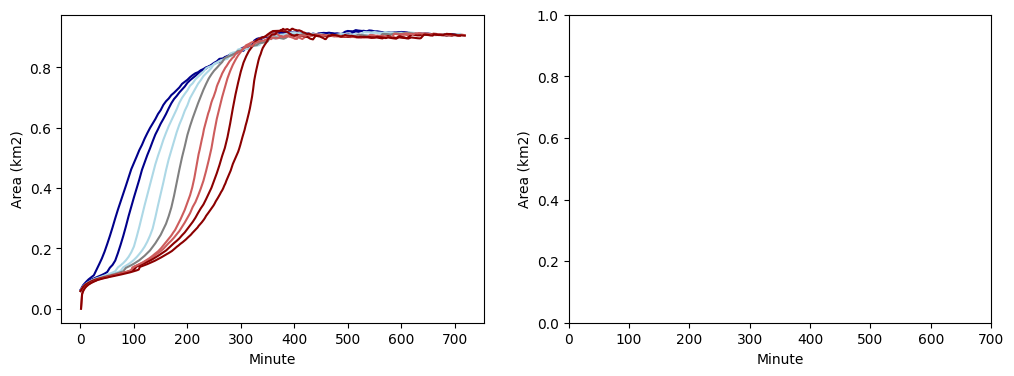

In [132]:
fig, ax = plt.subplots(ncols=2, figsize= (12,4))

colors_2mins = ['indianred', 'darkred']
colors_5mins = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','darkred' ]
colors_test = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]

for number, column in enumerate(df_5mins.columns[:-1]):
      ax[0].plot(df_5mins["minute"], df_5mins[column], color = colors_5mins[number]);           
        
for number, column in enumerate(df_2mins.columns[:-1]):
      ax[0].plot(df_2mins["minute"], df_2mins[column], color = colors_2mins[number]); 
        
# for number, column in enumerate(df_test.columns[:-1]):
#       ax[0].plot(df_test["minute"], df_test[column], color = colors_test[number]);    
        
# for number, column in enumerate(df_5mins.columns[:-1]):
#       ax[1].plot(df_5mins["minute"], df_5mins[column], color = colors_5mins[number])
        
# for number, column in enumerate(df_2mins.columns[:-1]):
#       ax[1].plot(df_2mins["minute"], df_2mins[column], color = colors_2mins[number]); 
        
# for number, column in enumerate(df_test.columns[:-1]):
#       ax[1].plot(df_test["minute"], df_test[column], color = colors_test[number]);     
        
ax[1].set_xlim(0,700)
ax[0].set_ylabel('Area (km2)')
ax[1].set_ylabel('Area (km2)')
ax[0].set_xlabel('Minute')
ax[1].set_xlabel('Minute');     

# fig.savefig("ProcessModelResults/Outputs/Figs/FloodedArea_OverTime.PNG")

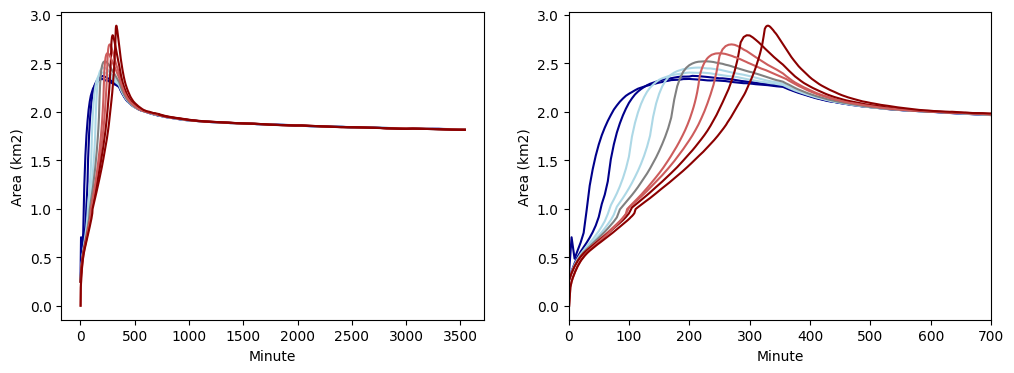

In [123]:
fig, ax = plt.subplots(ncols=2, figsize= (12,4))

colors_2mins = ['indianred', 'darkred']
colors_5mins = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','darkred' ]
colors_test = ['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]

for number, column in enumerate(df_5mins_withoutremoving.columns[:-1]):
      ax[0].plot(df_5mins_withoutremoving["minute"], df_5mins_withoutremoving[column], color = colors_5mins[number]);           
        
for number, column in enumerate(df_2mins_withoutremoving.columns[:-1]):
      ax[0].plot(df_2mins_withoutremoving["minute"], df_2mins_withoutremoving[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test_withoutremoving.columns[:-1]):
      ax[0].plot(df_test_withoutremoving["minute"], df_test_withoutremoving[column], color = colors_test[number]);    
        
for number, column in enumerate(df_5mins_withoutremoving.columns[:-1]):
      ax[1].plot(df_5mins_withoutremoving["minute"], df_5mins_withoutremoving[column], color = colors_5mins[number])
        
for number, column in enumerate(df_2mins_withoutremoving.columns[:-1]):
      ax[1].plot(df_2mins_withoutremoving["minute"], df_2mins_withoutremoving[column], color = colors_2mins[number]); 
        
for number, column in enumerate(df_test_withoutremoving.columns[:-1]):
      ax[1].plot(df_test_withoutremoving["minute"], df_test_withoutremoving[column], color = colors_test[number]);     
        
ax[1].set_xlim(0,700)
ax[0].set_ylabel('Area (km2)')
ax[1].set_ylabel('Area (km2)')
ax[0].set_xlabel('Minute')
ax[1].set_xlabel('Minute');     

# fig.savefig("ProcessModelResults/Outputs/Figs/FloodedArea_OverTime.PNG")